In [82]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,RBF, ConstantKernel as C

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
file = pd.read_csv("winequality-red.csv",delimiter=';')

In [17]:
print(file.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [18]:
x = file.drop(columns='alcohol')
y = file['alcohol']

In [19]:
len(file)

1599

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.33,random_state=42)

In [22]:
print(xtrain.shape, xtest.shape,ytrain.shape, ytest.shape)

(1071, 11) (528, 11) (1071,) (528,)


In [26]:
GPy.kern.RBF?

In [31]:
kernel = DotProduct() + WhiteKernel()

In [43]:
gpr = GaussianProcessRegressor(kernel= kernel, random_state=42).fit(xtrain, ytrain)

In [44]:
gpr.score(xtrain, ytrain)

0.3555122406096549

In [45]:
ypred = gpr.predict(xtest, return_std=True)

In [36]:
from sklearn import metrics

In [46]:
gpr.score(xtest,ytest)

0.3120519309920806

In [47]:
from sklearn.datasets import load_boston

In [76]:
X,y = load_boston(return_X_y=True)

In [78]:
Xt,xt,Yt,yt = train_test_split(X,y,test_size=0.25)

In [79]:
gpr = GaussianProcessRegressor(kernel= kernel, random_state=42).fit(Xt, Yt)

In [80]:
gpr.score(Xt,Yt)

0.7102713952326433

In [81]:
gpr.score(xt,yt)

0.7661386515901115

In [137]:
kernel = 1.0*WhiteKernel(10, (1e-2, 1e2))*DotProduct(10, (1e-2, 1e2)) + 1.0*RBF(10, (1e-2, 1e2)) 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9).fit(Xt,Yt)

In [138]:
gp.score(Xt,Yt)

0.91330874572017

In [139]:
gp.score(xt,yt)

0.8491203135823224

In [141]:
gp.log_marginal_likelihood()

-1183.322655496162

 C:\Users\HP RYZEN 3\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:346: UserWarning:Predicted variances smaller than 0. Setting those variances to 0.
 C:\Users\HP RYZEN 3\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:469: ConvergenceWarning:fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-393216.,  786432.]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 2, 'warnflag': 2}
 C:\Users\HP RYZEN 3\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:346: UserWarning:Predicted variances smaller than 0. Setting those variances to 0.


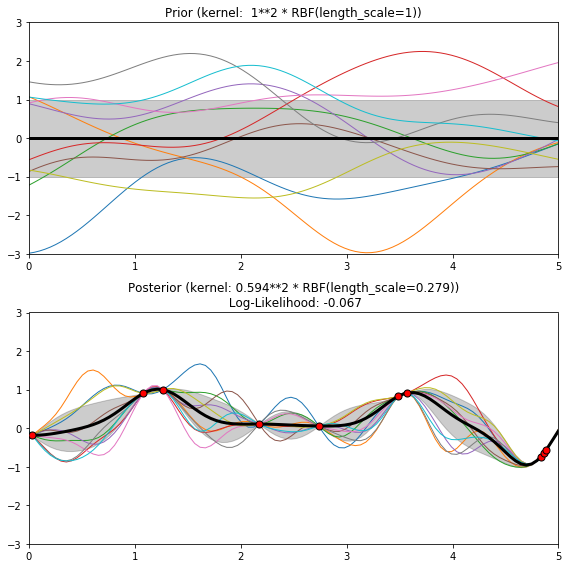

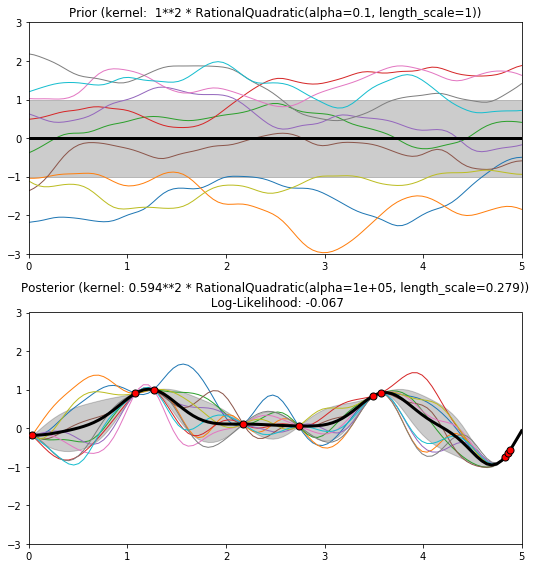

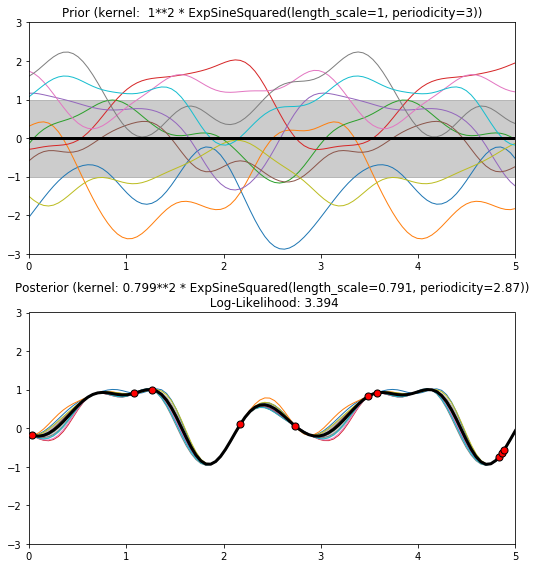

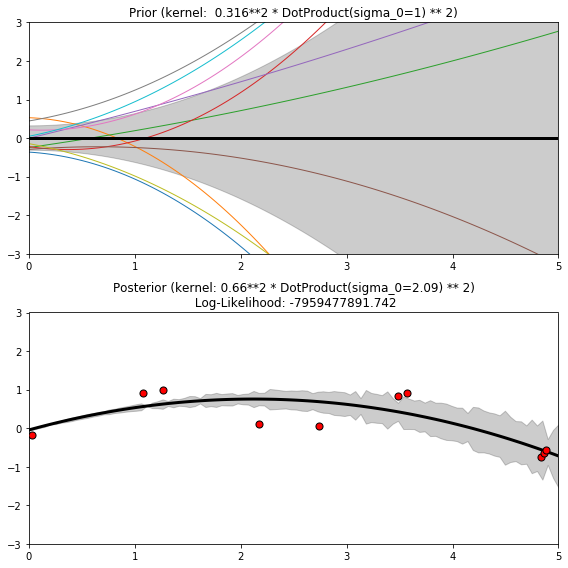

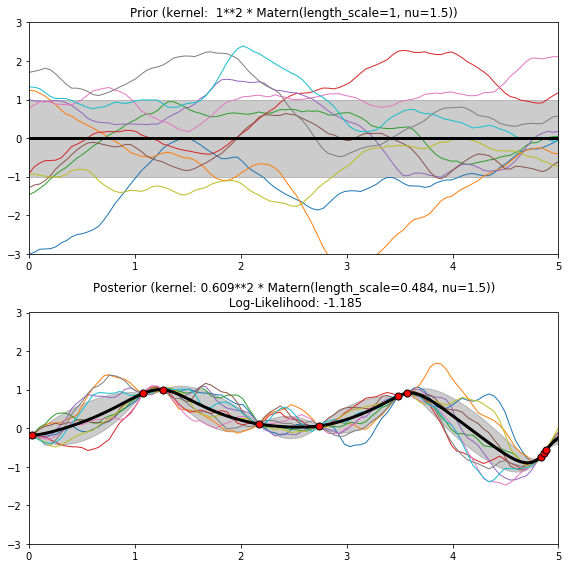

In [136]:
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
import numpy as np

kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

for kernel in kernels:
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()